In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [3]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

In [4]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [32]:
def create_dataset2(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [66]:
def create_dataset(X, y, history_size, target_size, time_steps=1):
    Xs, ys = [], []
    start_index = history_size
    end_index = len(X) - target_size
    for i in range(start_index, end_index):
        indices = np.arange(i-history_size, i, time_steps)
        Xs.append(X.iloc[indices].values)
        indices = np.arange(i, i+target_size)
        ys.append(y.iloc[indices].values)
    return np.array(Xs), np.array(ys)

In [67]:
time_steps = 2
hs = 20
ts = 6
# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, hs, ts, time_steps)
# X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)

(774, 10, 1) (774, 6)


In [69]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=ts))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

In [9]:
y_pred = model.predict(X_test)

In [30]:
def multi_step_plot(history, true_future, prediction):
    global STEP
    plt.figure(figsize=(12, 6))
    num_in = list(range(-len(history), 0))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:,1]), label='History')
    plt.plot(np.arange(num_out), np.array(true_future), 'g-',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out), np.array(prediction), 'r-',
                 label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()


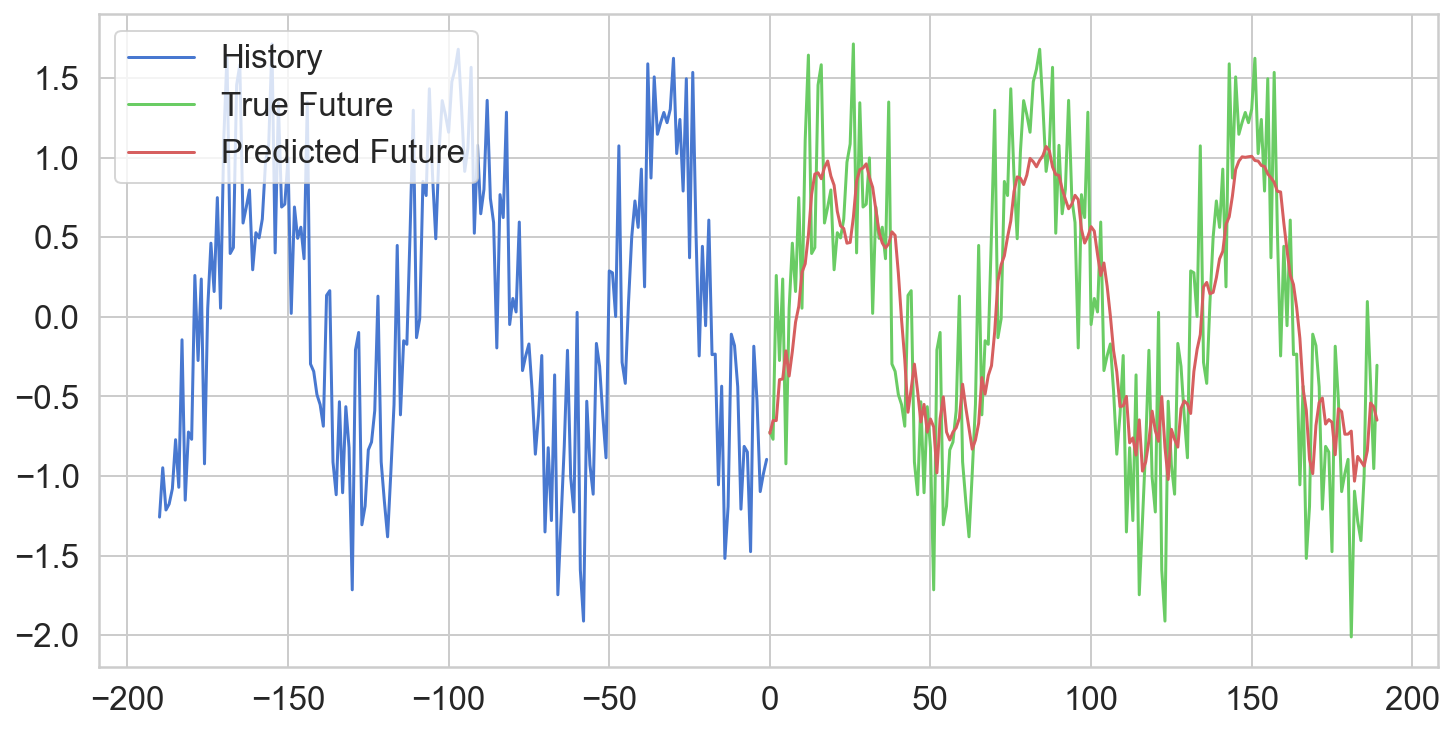

In [31]:
multi_step_plot(X_test, y_test, y_pred)

In [25]:
X_test[:,1]

array([[-1.25796605],
       [-0.94794722],
       [-1.2132574 ],
       [-1.175667  ],
       [-1.07972788],
       [-0.77155414],
       [-1.0706557 ],
       [-0.14375779],
       [-1.15158404],
       [-0.72332382],
       [-0.76906749],
       [ 0.26046046],
       [-0.27395119],
       [ 0.23821278],
       [-0.92319581],
       [ 0.05220603],
       [ 0.46340533],
       [ 0.15945522],
       [ 0.74959456],
       [ 0.05458456],
       [ 1.11114723],
       [ 1.64510596],
       [ 0.39846855],
       [ 0.43557347],
       [ 1.4568761 ],
       [ 1.58453331],
       [ 0.58993974],
       [ 0.68939227],
       [ 0.79772193],
       [ 0.29613921],
       [ 0.52911314],
       [ 0.49656723],
       [ 0.61495927],
       [ 0.97175579],
       [ 1.08656304],
       [ 1.71537687],
       [ 0.40222713],
       [ 1.34583634],
       [ 0.69042207],
       [ 0.70845847],
       [ 0.9990481 ],
       [ 0.0221145 ],
       [ 0.69068766],
       [ 0.49372549],
       [ 0.56364004],
       [ 0

In [26]:
np.arange(100)/STEP

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8])